In [106]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [107]:
#Load data using Torchvision MNIST for train and test datasets

train_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = True,
    transform=transforms.ToTensor(),
    download=True)

In [108]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [109]:
dir(train_dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [110]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [111]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [112]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [113]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [114]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [115]:
test_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True) 

In [116]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()

In [117]:
dir(test_dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [118]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [119]:
#Building the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10)
)
   

In [120]:
#use GPU cuda or CPU: cuda not available for mac
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [121]:
torch.cuda.is_available()

False

In [122]:
torch.cpu.is_available()

True

In [123]:
#Initialize loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [124]:
#data loader
#useful because it automatically generates batches in the training loop and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle = False)


In [125]:
#Check what the data loader does
#maps the values to (0,1)
#makes the data of shape (batch size,color,height,width)
temp_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=1,shuffle=True)

for x,y in temp_loader:
    print(x)
    print(x.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [126]:
x[0].shape

torch.Size([1, 28, 28])

In [127]:
y.shape

torch.Size([1])

In [128]:
train_dataset.transform(train_dataset.data.numpy())

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [129]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [137]:
#Train model
n_epochs = 10

#store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for it in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        #move data to GPU
        inputs, targets = inputs.to(device), targets.to(device)

        #reshape the imput 
        inputs = inputs.view(-1, 784)
        #zero the parameter gradients
        optimizer.zero_grad()

        #forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        #Backward and optimize
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    #get train loss and test loss
    train_loss = np.mean(train_loss)
    test_loss = []
    for inputs, targets in test_loader:
        inputs,targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    #save losses 
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    print(f'Epoch {it+1}/{n_epochs}, Train loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 1/10, Train loss: 0.3882, Test Loss: 0.2274
Epoch 2/10, Train loss: 0.1974, Test Loss: 0.1624
Epoch 3/10, Train loss: 0.1435, Test Loss: 0.1253
Epoch 4/10, Train loss: 0.1099, Test Loss: 0.1207
Epoch 5/10, Train loss: 0.0896, Test Loss: 0.0994
Epoch 6/10, Train loss: 0.0733, Test Loss: 0.0896
Epoch 7/10, Train loss: 0.0623, Test Loss: 0.0869
Epoch 8/10, Train loss: 0.0533, Test Loss: 0.0780
Epoch 9/10, Train loss: 0.0451, Test Loss: 0.0755
Epoch 10/10, Train loss: 0.0382, Test Loss: 0.0725


In [ ]:
train_losses

In [ ]:
test_losses

In [ ]:
model(inputs)

In [ ]:
criterion(outputs, targets)

In [131]:
np.float32(loss.item())

2.2499473

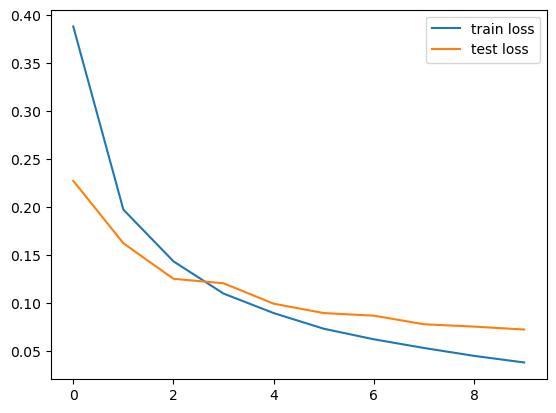

In [138]:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [141]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [142]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)